### Stop words tutorial

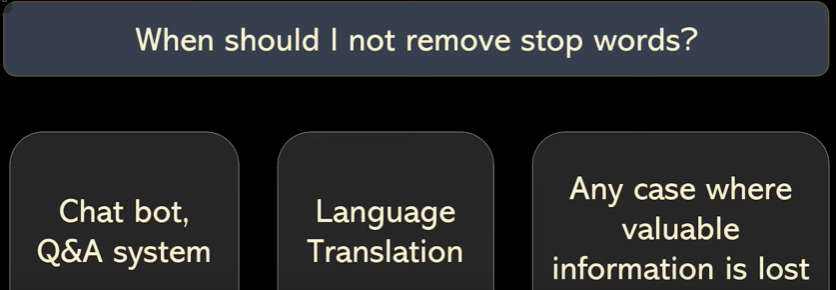

In [3]:
import spacy

from spacy.lang.en.stop_words import STOP_WORDS

print(len(STOP_WORDS))
print(STOP_WORDS) #all stopwords in the modwl.

326
{'two', 'behind', 'already', 'can', 'in', 'another', 'could', 'own', 'sixty', 'less', 'regarding', 'same', 'any', 'at', 'as', 'no', 'every', 'anyway', 'thereby', 'what', 'itself', 'go', 'whither', 'both', 'where', 'to', 'themselves', 'therefore', 'next', 'might', 'besides', 'but', 'whatever', 'this', 'see', 'once', 'four', 'until', 'using', 'hereupon', 'do', 'was', 'and', 'below', 'thus', "'m", 'down', 'unless', "'ll", 'somewhere', 'few', 'alone', 'n’t', 'somehow', 're', 'hence', 'six', 'more', 'over', 'with', 'indeed', 'becoming', 'about', 'nine', 'whereupon', 'fifty', 'much', 'seemed', 'them', 'although', 'also', 'onto', 'on', 'something', 'formerly', 'while', 'bottom', 'sometime', 'afterwards', 'for', 'may', 'who', "n't", 'back', 'seeming', 'other', 'himself', 'others', 'sometimes', 'too', 'latter', 'all', 'when', 'him', 'because', '‘ll', 'hereby', 'last', 'well', 'within', 'third', 'whoever', '’ve', 'had', 'the', 'beyond', 'just', 'full', 'side', 'upon', 'your', 'by', 'doing', 

In [5]:
nlp = spacy.load("en_core_web_sm")

doc = nlp("We just opened our wings, the flying part is coming soon")

for token in doc:
    if token.is_stop:
        print(token)

We
just
our
the
part
is


In [7]:
def preprocess(text): # Generally Complete preprocessing is done here from stemming lemmatization etc. to stopword removal.
    doc = nlp(text)
    
    no_stop_words = [token.text for token in doc if not token.is_stop] # Removing stopwords only
    return " ".join(no_stop_words)            

In [9]:
def preprocess_no_stop_no_punc(text):
    doc = nlp(text)
    
    no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct] # Removing stopwords and punctuations.
    return " ".join(no_stop_words)       

In [11]:
preprocess("Musk wants time to prepare for a trial over his")

'Musk wants time prepare trial'

In [13]:
preprocess("The other is not other but your divine brother")

'divine brother'

##### Remove stop words from pandas dataframe text column

Dataset is downloaded from: https://www.kaggle.com/datasets/jbencina/department-of-justice-20092018-press-releases
It contains press releases of different court cases from depart of justice (DOJ). The releases contain information such as outcomes of criminal cases, notable actions taken against felons, or other updates about the current administration.

In [17]:
import pandas as pd

df = pd.read_json("doj_press.json",lines=True)

df.shape

(13087, 6)

In [98]:
df.head(5)

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [21]:
type(df.topics[0])

list

Filter out those rows that do not have any topics associated with the case

In [23]:
df = df[df["topics"].str.len() != 0] # list converted to string and if len not zero then filtered.
df.head()

,id,title,contents,date,topics,components
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division]
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U..."
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division]
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]"


In [25]:
df.shape

(4688, 6)

In [27]:
df =df.head(100)
df.shape

(100, 6)

In [33]:
df["contents"].iloc[4]

'21st Century Oncology Inc. and certain of its subsidiaries and affiliates have agreed to pay $26 million to the government to resolve a self-disclosure relating to the submission of false attestations regarding the company’s use of electronic health records software and separate allegations that they violated the False Claims Act by submitting, or causing the submission of, claims for certain services provided pursuant to referrals from physicians with whom they had improper financial relationships. \xa0 “The Justice Department is committed to zealously investigating improper financial relationships that have the potential to compromise physicians’ medical judgment,” said Acting Assistant Attorney General Chad A. Readler of the Justice Department’s Civil Division.\xa0 “However, we will work with companies that accept responsibility for their past compliance failures and promptly take corrective action.”  \xa0 21st Century Oncology, which is headquartered in Fort Myers, Florida, owns a

In [35]:
len(df["contents"].iloc[4])

5504

In [37]:
df["contents_new"] = df.contents.apply(preprocess) # removal of stopwords from entire column

In [41]:
df["contents_new"].iloc[4]

'21st Century Oncology Inc. certain subsidiaries affiliates agreed pay $ 26 million government resolve self - disclosure relating submission false attestations company use electronic health records software separate allegations violated False Claims Act submitting , causing submission , claims certain services provided pursuant referrals physicians improper financial relationships . \xa0  “ Justice Department committed zealously investigating improper financial relationships potential compromise physicians ’ medical judgment , ” said Acting Assistant Attorney General Chad A. Readler Justice Department Civil Division . \xa0  “ , work companies accept responsibility past compliance failures promptly corrective action . ”  \xa0  21st Century Oncology , headquartered Fort Myers , Florida , owns operates subsidiaries affiliates United States provide integrated cancer care . \xa0  business , 21st Century Oncology subsidiaries affiliates employ physicians specialty fields radiation oncology ,

In [43]:
len(df.contents[4])

6286

In [45]:
len(df.contents_new[4])

4810

In [47]:
df.contents[4][:300]

'The U.S. Department of Justice, the U.S. Environmental Protection Agency (EPA), and the Rhode Island Department of Environmental Management (RIDEM) announced today that two subsidiaries of Stanley Black & Decker Inc.—Emhart Industries Inc. and Black & Decker Inc.—have agreed to clean up dioxin conta'

In [49]:
df.contents_new[4][:300]

'U.S. Department Justice , U.S. Environmental Protection Agency ( EPA ) , Rhode Island Department Environmental Management ( RIDEM ) announced today subsidiaries Stanley Black & Decker Inc.—Emhart Industries Inc. Black & Decker Inc.—have agreed clean dioxin contaminated sediment soil Centredale Manor'

##### Examples where removing stop words can create a problem

**(1) Sentiment detection: Not always but in some cases, based on your dataset it can change the sentiment of a sentence if you remove stop words**

In [51]:
preprocess("this is a good movie")

'good movie'

In [53]:
preprocess("this is not a good movie")

'good movie'

**(2) Language translation: Say you want to translate following sentence from english to telugu. Before actual translation if you remove stop words and then translate, it will produce horrible result**

In [55]:
preprocess("how are you doing dhaval?")

'dhaval ?'

**(3) Chat bot or any Q&A system**

In [58]:
preprocess("I don't find yoga mat on your website. Can you help?")

'find yoga mat website . help ?'